# MACS PSet 3 Dynamic Programming


In [343]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import scipy.stats as sts 
from mpl_toolkits import mplot3d
import warnings
warnings.filterwarnings('ignore')

### Exercise 1

If the individual only lives for $T = 1$:
$$\begin{equation*}
\max_{W_2 \in[0, W_1]} u(W_1 - W_2)
\end{equation*}$$

Therefore, he will consume all of cake in period 1, which means the optimal amount of $W_2 = 0$.

### Exercise 2

If the individual only lives for $T = 1$ and $T = 2$, then the condition that characterizes the optimal amount of cake to leave for next period $W_3$ in period 2:
$$\begin{equation*}
\max_{W_3 \in[0, W_2]} u(W_2 - W_3)
\end{equation*}$$

And the condition that characterizes the optimal amount of cake to leave for next period $W_2$ in period 1:
$$\begin{equation*}
\max_{W_2 \in[0, W_1]} \Bigl(u(W_1 - W_2) + \max_{W_3 \in[0, W_2]} \beta u(W_2 - W_3) \Bigr)
\end{equation*}$$

### Exercise 3

If the individual only lives for $T = 1$, $T = 2$ and $T = 3$, then the condition that characterizes the optimal amount of cake to leave for next period $W_4$ in period 3:
$$\begin{equation*}
\max_{W_4 \in[0, W_3]} u(W_3 - W_4)
\end{equation*}$$

And the condition that characterizes the optimal amount of cake to leave for next period $W_3$ in period 2:
$$\begin{equation*}
\max_{W_3 \in[0, W_2]} \Bigl(u(W_2 - W_3) + \max_{W_4 \in[0, W_3]} \beta u(W_3 - W_4) \Bigr)
\end{equation*}$$

And the condition that characterizes the optimal amount of cake to leave for next period $W_2$ in period 1:
$$\begin{equation*}
\max_{W_2 \in[0, W_1]} \Bigl(u(W_1 - W_2) + \max_{W_3 \in[0, W_2]} \beta \Bigl(u(W_2 - W_3) + \max_{W_4 \in[0, W_3]} \beta u(W_3 - W_4) \Bigr)
\end{equation*}$$


Given that $\beta = 0.9$ and $W_1 = 1$, we can solve this equation by pluging in $u(c_t) = ln(c_t)$, then we have $W_1 = 1$, $W_2 = 0.631$, $W_3 = 0.299$ and $W_4 = 0$, and $c_1 = 0.369$, $c_2 = 0.332$, $c_3 = 0.299$.

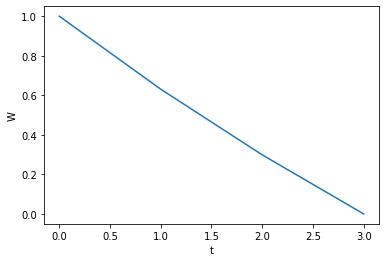

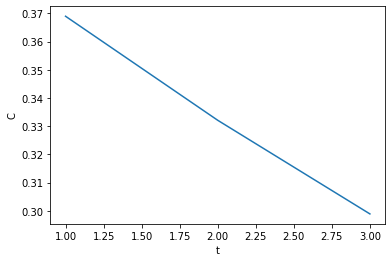

In [344]:
beta = 0.9
W_1 = 1
W_2 = (beta+beta**2)/(beta+beta**2+1)
W_3 = (beta**2)/(beta+beta**2+1)
W_4 = 0
C_1 = W_1-W_2
C_2 = W_2-W_3
C_3 = W_3-W_4
W = [W_1,W_2,W_3,W_4]
C = [C_1,C_2,C_3]
t = [0,1,2,3]
plt.plot(t,W)
plt.xlabel('t')
plt.ylabel('W')
plt.show()

plt.plot(t[1:],C)
plt.xlabel('t')
plt.ylabel('C')
plt.show()

### Exercise 4

The equation by envelope theorem:
$$\begin{equation*}
V_{T-1}(W_{T-1}) \equiv \max_{W_T}  u(W_{T-1} - W_T) + \beta V_T(W_T)
\end{equation*}$$

The condition for optimal choice derived by FOC:
$$\begin{equation*}
\max_{W_T}  - u'(W_{T-1} - \psi_{T-1}(W_{T-1})) + \beta u'(W_{T-1} -\psi_{T-1}(W_{T-1}))
\end{equation*}$$

Repalce $W_T$ by $\psi_{T-1}(W_{T-1})$ in the value function:
$$\begin{equation*}
V_{T-1}(W_{T-1}) = \max_{\psi_{T-1}(W_{T-1})} u(W_{T-1} - \psi_{T-1}(W_{T-1})) + \beta V_T(\psi_{T-1}(W_{T-1}))
\end{equation*}$$

### Exercise 5

Since $T$ is the last period, then we have $\psi_{T}(\bar{W}) = 0$. However, $\psi_{T-1}(\bar{W}) = W_T \neq 0$, then $\psi_{T-1}(\bar{W}) \neq \psi_{T}(\bar{W})$.

For the utility function:
$$\begin{equation*}
V_{T-1}(\bar{W}) = \max_{W_T}  u(\bar{W} - W_T) + \beta V_T(W_T)
\end{equation*}$$
The FOC:
$$\begin{equation*}
W_T = \frac{\beta \bar{W}}{1+\beta} 
\end{equation*}$$

Plugging $W_T$ into the utility function:
$$\begin{equation*}
V_{T-1}(\bar{W}) = ln(\frac{\bar{W}}{1+\beta} ) + \beta ln(\frac{\beta \bar{W}}{1+\beta})
\end{equation*}$$
And the utility function at T period:
$$\begin{equation*}
V_{T}(\bar{W}) = ln(\frac{\beta \bar{W}}{1+\beta})
\end{equation*}$$

Therefore, $V_{T}(\bar{W}) \neq V_{T-1}(\bar{W})$

### Exercise 6

The Bellman equation at T-2 is:
$$\begin{equation*}
V_{T-2}(W_{T-2}) = \max_{W_{T-1}}  ln(W_{T-2} - W_{T-1}) + \beta ln(\frac{W_{T-1}}{1+\beta}) + \beta^2 ln(\frac{\beta W_{T-1}}{1+\beta})
\end{equation*}$$

The FOC at T-2 is:
$$\begin{equation*}
\frac{-1}{W_{T-2} - \psi_{T-2}(W_{T-2})} +  \frac{\beta + \beta^2}{\psi_{T-2}(W_{T-2})} = 0
\end{equation*}$$
which means:
$$\begin{equation*}
\psi_{T-2}(W_{T-2}) = \frac{(\beta + \beta^2)W_{T-2}}{1 + \beta + \beta^2}
\end{equation*}$$

Therefore, rewrite the Bellman equation at T-2:
$$\begin{equation*}
V_{T-2}(W_{T-2}) = ln(\frac{W_{T-2}}{1 + \beta + \beta^2}) + \beta ln(\frac{\beta W_{T-2}}{1 + \beta + \beta^2}) + \beta^2 ln(\frac{\beta^2 W_{T-2}}{1 + \beta + \beta^2})
\end{equation*}$$

### Exercise 7

Hypothesis:
$$\begin{equation*}
\psi_{T-s}(W_{T-s}) = \frac{\sum_{i=1}^{s} \beta^i}{\sum_{i=0}^{s} \beta^i} W_{T-s}
\end{equation*}$$

$$\begin{equation*}
V_{T-s}(W_{T-s}) = \sum_{i=1}^{s}\beta^i \Bigl(ln(\frac{\beta^i W_{T-s}}{\sum_{j=0}^{s} \beta^j})\Bigr)
\end{equation*}$$

When $s \to \infty$,
$$\begin{equation*}
lim_{s\to\infty} \psi_{T-s}(W_{T-s}) = \beta W_{T-s}
\end{equation*}$$

$$\begin{equation*}
lim_{s\to\infty} V_{T-s}(W_{T-s}) = \frac{\beta ln(\beta)}{(1-\beta)^2} + \frac{1}{1-\beta} ln((1-\beta)W_{T-s})
\end{equation*}$$



### Exercise 8

When the horizon is infinite (either $T = \infty $ or $s = \infty$), the Bellman equation becomes:
$$\begin{equation*}
V(W) = \max_{W' \in [0,W]} u(W-W') + \beta V(W')
\end{equation*}$$

### Exercise 9

In [345]:
Wmin, Wmax = 0.01, 1
beta = 0.9
N = 100
W = np.linspace(Wmin,Wmax,N)
W

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

### Exercise 10

The resulting policy function is:
$$\begin{equation*}
W' = \psi_T(W) = 0
\end{equation*}$$
The resulting value function is:
$$\begin{equation*}
V_T(W) = ln(W)
\end{equation*}$$

In [346]:
def u(c):
    util = np.zeros_like(c)
    util=np.log(c)
    return util

V_prime = np.zeros((N,N))
c_mat = np.tile(W.reshape((N,1)),((1,N))) - np.tile(W.reshape((1,N)),((N,1)))
c_pos = c_mat > 0
c_mat[~c_pos] = 1e-10
u_mat = u(c_mat)
V_prime[~c_pos] = 1e-10

V_T = u_mat + beta*V_prime
V_mat  = V_T.max(axis=1)
ind = np.argmax(V_T,axis=1)
print(V_mat)

[-2.30258509e+01 -4.60517019e+00 -3.91202301e+00 -3.50655790e+00
 -3.21887582e+00 -2.99573227e+00 -2.81341072e+00 -2.65926004e+00
 -2.52572864e+00 -2.40794561e+00 -2.30258509e+00 -2.20727491e+00
 -2.12026354e+00 -2.04022083e+00 -1.96611286e+00 -1.89711998e+00
 -1.83258146e+00 -1.77195684e+00 -1.71479843e+00 -1.66073121e+00
 -1.60943791e+00 -1.56064775e+00 -1.51412773e+00 -1.46967597e+00
 -1.42711636e+00 -1.38629436e+00 -1.34707365e+00 -1.30933332e+00
 -1.27296568e+00 -1.23787436e+00 -1.20397280e+00 -1.17118298e+00
 -1.13943428e+00 -1.10866262e+00 -1.07880966e+00 -1.04982212e+00
 -1.02165125e+00 -9.94252273e-01 -9.67584026e-01 -9.41608540e-01
 -9.16290732e-01 -8.91598119e-01 -8.67500568e-01 -8.43970070e-01
 -8.20980552e-01 -7.98507696e-01 -7.76528789e-01 -7.55022584e-01
 -7.33969175e-01 -7.13349888e-01 -6.93147181e-01 -6.73344553e-01
 -6.53926467e-01 -6.34878272e-01 -6.16186139e-01 -5.97837001e-01
 -5.79818495e-01 -5.62118918e-01 -5.44727175e-01 -5.27632742e-01
 -5.10825624e-01 -4.94296

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01]


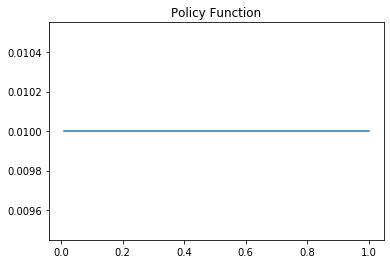

In [347]:
V_prime = np.zeros(N).reshape(N,1)
V_init = u(W)
c_mat = np.tile(W.reshape((N,1)),((1,N))) - np.tile(W.reshape((1,N)),((N,1)))
c_pos = c_mat > 0
c_mat[~c_pos] = 1e-10
u_mat = u(c_mat)
V_Tml = u_mat + beta*V_prime
V_new  = V_Tml.max(axis=1)
ind = np.argmax(V_Tml,axis=1)

print(W[ind])
plt.plot(W,W[ind])
plt.title("Policy Function")
plt.show()

[-2.30258509e+01 -4.60517019e+00 -3.91202301e+00 -3.50655790e+00
 -3.21887582e+00 -2.99573227e+00 -2.81341072e+00 -2.65926004e+00
 -2.52572864e+00 -2.40794561e+00 -2.30258509e+00 -2.20727491e+00
 -2.12026354e+00 -2.04022083e+00 -1.96611286e+00 -1.89711998e+00
 -1.83258146e+00 -1.77195684e+00 -1.71479843e+00 -1.66073121e+00
 -1.60943791e+00 -1.56064775e+00 -1.51412773e+00 -1.46967597e+00
 -1.42711636e+00 -1.38629436e+00 -1.34707365e+00 -1.30933332e+00
 -1.27296568e+00 -1.23787436e+00 -1.20397280e+00 -1.17118298e+00
 -1.13943428e+00 -1.10866262e+00 -1.07880966e+00 -1.04982212e+00
 -1.02165125e+00 -9.94252273e-01 -9.67584026e-01 -9.41608540e-01
 -9.16290732e-01 -8.91598119e-01 -8.67500568e-01 -8.43970070e-01
 -8.20980552e-01 -7.98507696e-01 -7.76528789e-01 -7.55022584e-01
 -7.33969175e-01 -7.13349888e-01 -6.93147181e-01 -6.73344553e-01
 -6.53926467e-01 -6.34878272e-01 -6.16186139e-01 -5.97837001e-01
 -5.79818495e-01 -5.62118918e-01 -5.44727175e-01 -5.27632742e-01
 -5.10825624e-01 -4.94296

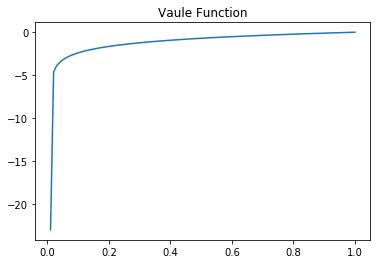

In [348]:
print(V_new)
plt.plot(W,V_new)
plt.title("Vaule Function")
plt.show()

### Exercise 11

In [349]:
def dist(x,y):
    return np.sum((x-y)**2)
V_0 = np.zeros((N,1))
print("The distance is: ",dist(V_new,V_0))

The distance is:  70911.59217075679


### Exercise 12

In [350]:
V_prime = V_new
V_init = u(W)
c_mat = np.tile(W.reshape((N,1)),((1,N))) - np.tile(W.reshape((1,N)),((N,1)))
c_pos = c_mat > 0
c_mat[~c_pos] = 1e-10
u_mat = u(c_mat)
V_prime = np.tile(V_new.reshape((1,N)),((N,1)))
V_prime[~c_pos] = 1e-10
V_Tml = u_mat + beta*V_prime
V_new1  = V_Tml.max(axis=1)
ind = np.argmax(V_Tml,axis=1)


[0.01 0.02 0.02 0.02 0.03 0.03 0.04 0.04 0.05 0.05 0.06 0.06 0.07 0.07
 0.08 0.08 0.09 0.09 0.1  0.1  0.1  0.11 0.11 0.12 0.12 0.13 0.13 0.14
 0.14 0.15 0.15 0.16 0.16 0.17 0.17 0.18 0.18 0.19 0.19 0.19 0.2  0.2
 0.21 0.21 0.22 0.22 0.23 0.23 0.24 0.24 0.25 0.25 0.26 0.26 0.27 0.27
 0.28 0.28 0.28 0.29 0.29 0.3  0.3  0.31 0.31 0.32 0.32 0.33 0.33 0.34
 0.34 0.35 0.35 0.36 0.36 0.37 0.37 0.37 0.38 0.38 0.39 0.39 0.4  0.4
 0.41 0.41 0.42 0.42 0.43 0.43 0.44 0.44 0.45 0.45 0.46 0.46 0.46 0.47
 0.47 0.48]


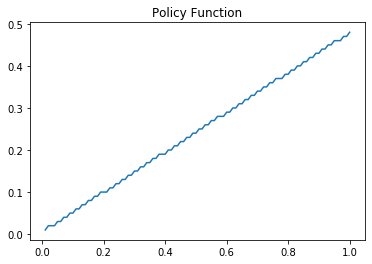

In [351]:
print(W[ind])
plt.plot(W,W[ind])
plt.title("Policy Function")
plt.show()

[-23.02585093 -23.02585093  -8.74982335  -8.05667617  -7.43284371
  -7.0273786   -6.66246     -6.37477793  -6.11586407  -5.89272052
  -5.69189132  -5.50956976  -5.34548036  -5.19132968  -5.05259407
  -4.91906268  -4.79888442  -4.68110139  -4.57509666  -4.46973614
  -4.37442596  -4.2796015   -4.19259012  -4.10681096  -4.02676825
  -3.94845801  -3.87435004  -3.8023116   -3.73331873  -3.66662156
  -3.60208303  -3.53998945  -3.47936483  -3.42128016  -3.36412175
  -3.30955959  -3.25549236  -3.20404979  -3.1527565   -3.10396633
  -3.05530583  -3.00878582  -2.96262185  -2.91817009  -2.87425894
  -2.83169933  -2.78983132  -2.74900932  -2.70900273  -2.66978202
  -2.63147837  -2.59373804  -2.55699824  -2.5206306   -2.48533196
  -2.45024064  -2.41627434  -2.38237279  -2.34958297  -2.31685209
  -2.28510339  -2.2535212   -2.22274954  -2.19223815  -2.16238519
  -2.13287434  -2.10388681  -2.07531298  -2.0471421   -2.01944761
  -1.99204864  -1.96518097  -1.93851272  -1.91242394  -1.88644845
  -1.86109

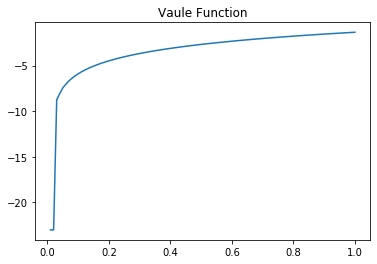

In [352]:
print(V_new1)
plt.plot(W,V_new1)
plt.title("Vaule Function")
plt.show()

### Exercise 13

In [353]:
V_prime = V_new1
V_init = u(W)
c_mat = np.tile(W.reshape((N,1)),((1,N))) - np.tile(W.reshape((1,N)),((N,1)))
c_pos = c_mat > 0
c_mat[~c_pos] = 1e-10
u_mat = u(c_mat)
V_prime = np.tile(V_new1.reshape((1,N)),((N,1)))
V_prime[~c_pos] = 1e-10
V_Tml = u_mat + beta*V_prime
V_new2  = V_Tml.max(axis=1)
ind = np.argmax(V_Tml,axis=1)


[0.01 0.02 0.03 0.03 0.03 0.04 0.05 0.05 0.06 0.07 0.07 0.08 0.09 0.09
 0.1  0.1  0.11 0.12 0.12 0.13 0.14 0.14 0.15 0.16 0.16 0.17 0.18 0.18
 0.19 0.19 0.2  0.2  0.21 0.22 0.22 0.23 0.24 0.24 0.25 0.26 0.26 0.27
 0.28 0.28 0.29 0.29 0.3  0.31 0.31 0.32 0.33 0.33 0.34 0.35 0.35 0.36
 0.36 0.37 0.37 0.38 0.39 0.39 0.4  0.41 0.41 0.42 0.43 0.43 0.44 0.45
 0.45 0.46 0.46 0.47 0.48 0.48 0.49 0.5  0.5  0.51 0.52 0.52 0.53 0.53
 0.54 0.55 0.55 0.56 0.56 0.57 0.58 0.58 0.59 0.6  0.6  0.61 0.62 0.62
 0.63 0.64]


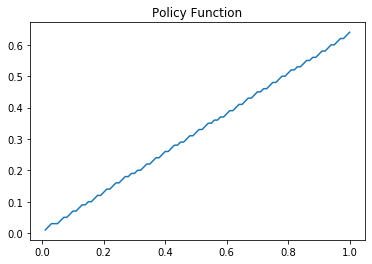

In [354]:
print(W[ind])
plt.plot(W,W[ind])
plt.title("Policy Function")
plt.show()

[-23.02585093 -23.02585093 -23.02585093 -12.4800112  -11.78686402
 -11.16303156 -10.60158234 -10.19611724  -9.83119864  -9.5027719
  -9.21508983  -8.95617596  -8.72315349  -8.50000993  -8.29918074
  -8.11685918  -7.9361129   -7.7720235   -7.61787282  -7.47019236
  -7.33145675  -7.19792536  -7.07306331  -6.95288505  -6.83510202
  -6.72694159  -6.62093686  -6.51557634  -6.42017208  -6.3248619
  -6.23003744  -6.14302606  -6.0572469   -5.97190488  -5.89186218
  -5.81355194  -5.73635069  -5.66224272  -5.59020428  -5.51972507
  -5.45073219  -5.38403502  -5.31920043  -5.25466191  -5.19256832
  -5.1319437   -5.07191624  -5.01383157  -4.95667316  -4.90078893
  -4.84622677  -4.79215955  -4.73988335  -4.68844078  -4.63714748
  -4.58804154  -4.53925138  -4.49059088  -4.44407086  -4.39777255
  -4.35160858  -4.30715682  -4.26324567  -4.21945122  -4.17689161
  -4.13502359  -4.09347602  -4.05265403  -4.01264744  -3.97312741
  -3.9339067   -3.89560304  -3.85786272  -3.8201815   -3.78344171
  -3.7470740

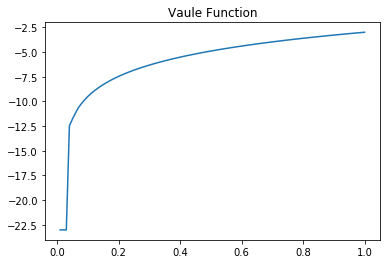

In [355]:
print(V_new2)
plt.plot(W,V_new2)
plt.title("Vaule Function")
plt.show()

### Exercise 14

In [356]:
Wmin, Wmax = 0.01, 1
beta = 0.9
N = 100
W = np.linspace(Wmin,Wmax,N)
c_mat = np.tile(W.reshape((N,1)),((1,N))) - np.tile(W.reshape((1,N)),((N,1)))
c_pos = c_mat > 0
c_mat[~c_pos] = 1e-10
u_mat = u(c_mat)

# Iteration
i = 0
d = 1
V_ite = np.zeros((1,N))
while i <= 1000 and d >= 1e-9:
    V_prime = np.tile(V_ite.reshape((1,N)),(N,1))
    V_prime[~c_pos] = 1e-10
    V_ite = u_mat + beta*V_prime
    V_new  = V_ite.max(axis=1)
    idx = np.argmax(V_ite,axis=1)
    d = dist(V_ite, V_new)
    print("Iteration: ", i, "Distance: ", d)
    V_ite = V_new
    i += 1

Iteration:  0 Distance:  2621445.1861534524
Iteration:  1 Distance:  2226039.339379367
Iteration:  2 Distance:  1811950.884645822
Iteration:  3 Distance:  1430640.0113098028
Iteration:  4 Distance:  1100193.8179429094
Iteration:  5 Distance:  825071.163550742
Iteration:  6 Distance:  602540.2938846732
Iteration:  7 Distance:  424988.2264254881
Iteration:  8 Distance:  288132.94422936765
Iteration:  9 Distance:  187287.6919060703
Iteration:  10 Distance:  116433.51001122879
Iteration:  11 Distance:  70117.9795380831
Iteration:  12 Distance:  44285.71239566491
Iteration:  13 Distance:  36006.359040657306
Iteration:  14 Distance:  36140.5243124122
Iteration:  15 Distance:  36140.5243124122
Iteration:  16 Distance:  36140.5243124122
Iteration:  17 Distance:  36140.5243124122
Iteration:  18 Distance:  36140.5243124122
Iteration:  19 Distance:  36140.5243124122
Iteration:  20 Distance:  36140.5243124122
Iteration:  21 Distance:  36140.5243124122
Iteration:  22 Distance:  36140.5243124122
Ite

### Exercise 15

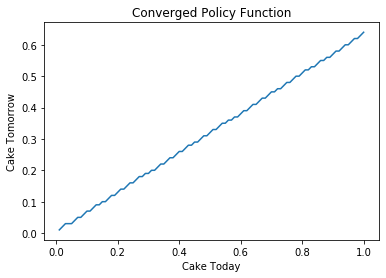

In [357]:
plt.plot(W,W[ind])
plt.title("Converged Policy Function")
plt.xlabel("Cake Today")
plt.ylabel("Cake Tomorrow")
plt.show()

### Exercise 16

In [358]:
sigma = 0.5
mu = 4*sigma
M = 7
ep = np.linspace(mu-3*sigma,mu+3*sigma,M)
ep

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5])

In [359]:
gamma = np.zeros(M)
for i in range(M):
    if i == 0:
        gamma[i] = sts.norm.cdf((ep[i]+ep[i+1])/2,mu,sigma)
    elif i > 0 and i < M-1:
        gamma[i] = sts.norm.cdf((ep[i]+ep[i+1])/2,mu,sigma)-sts.norm.cdf((ep[i]+ep[i-1])/2,mu,sigma)
    elif i == M-1:
        gamma[i] = 1- sts.norm.cdf((ep[i]+ep[i-1])/2,mu,sigma)
print(gamma)
print("Sum of Pr is: ",sum(gamma))
    

[0.00620967 0.06059754 0.24173034 0.38292492 0.24173034 0.06059754
 0.00620967]
Sum of Pr is:  1.0


### Exercise 17

In [360]:
N = 100
W = np.linspace(1e-2,1,N)

c_mat = np.tile(W.reshape((N,1)),((1,N))) - np.tile(W.reshape((1,N)),((N,1)))
c_pos = c_mat>0
c_mat[~c_pos] = 1e-10
u_mat = u(c_mat)
V_prime = np.tile(V_new1.reshape((1,N)),((N,1)))
V_prime[~c_pos] = 1e-10
V_3d = np.array([u_mat*i for i in ep])

V_0 = np.zeros((N,M))
V_prime = V_0 @ gamma.reshape((M,1))
V_prime_mat = np.tile(V_prime.reshape((N,1)),((1,N)))
V_prime_mat[~c_pos] = 1e-10
V_prime_3d = np.array([V_prime_mat for j in range(M)])

V_3d_new = V_3d + beta*V_prime_3d

V_new = np.zeros((N,M))
W_new = np.zeros((N,M))
for i in range(N):
    mat = V_3d_new[:,i,:]
    V_new[i] = mat.max(axis=1)
    ind = np.argmax(mat,axis=1)
    W_new[i] = W[ind]
print(W_new)

[[0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 

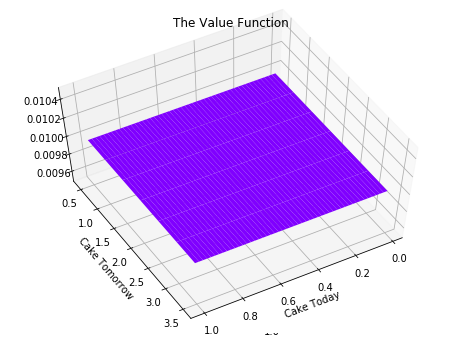

In [361]:
x,y = np.meshgrid(W[1:],ep)
plt_3d = plt.figure(figsize=(8,6))
fig = plt_3d.gca(projection='3d')
fig = plt_3d.add_subplot(111,projection='3d')
fig.plot_surface(x.T,y.T,W_new[1:],cmap=cm.rainbow)
fig.set_xlabel('Cake Today')
fig.set_ylabel('Taste Shock')
fig.set_ylabel('Cake Tomorrow')
fig.set_title('The Value Function')
fig.view_init(elev=60,azim=60)

In [362]:
print(V_new)

[[-1.15129255e+01 -2.30258509e+01 -3.45387764e+01 -4.60517019e+01
  -5.75646273e+01 -6.90775528e+01 -8.05904783e+01]
 [-2.30258509e+00 -4.60517019e+00 -6.90775528e+00 -9.21034037e+00
  -1.15129255e+01 -1.38155106e+01 -1.61180957e+01]
 [-1.95601150e+00 -3.91202301e+00 -5.86803451e+00 -7.82404601e+00
  -9.78005751e+00 -1.17360690e+01 -1.36920805e+01]
 [-1.75327895e+00 -3.50655790e+00 -5.25983685e+00 -7.01311579e+00
  -8.76639474e+00 -1.05196737e+01 -1.22729526e+01]
 [-1.60943791e+00 -3.21887582e+00 -4.82831374e+00 -6.43775165e+00
  -8.04718956e+00 -9.65662747e+00 -1.12660654e+01]
 [-1.49786614e+00 -2.99573227e+00 -4.49359841e+00 -5.99146455e+00
  -7.48933068e+00 -8.98719682e+00 -1.04850630e+01]
 [-1.40670536e+00 -2.81341072e+00 -4.22011608e+00 -5.62682143e+00
  -7.03352679e+00 -8.44023215e+00 -9.84693751e+00]
 [-1.32963002e+00 -2.65926004e+00 -3.98889006e+00 -5.31852007e+00
  -6.64815009e+00 -7.97778011e+00 -9.30741013e+00]
 [-1.26286432e+00 -2.52572864e+00 -3.78859297e+00 -5.05145729e+0

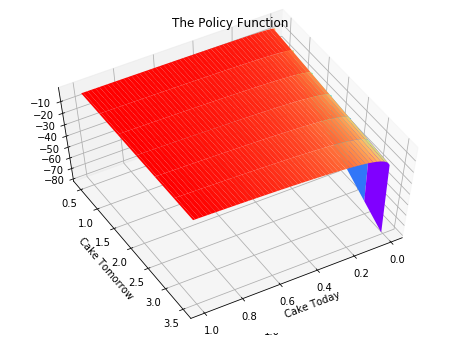

In [363]:
x,y = np.meshgrid(W,ep)
plt_3d = plt.figure(figsize=(8,6))
fig = plt_3d.gca(projection='3d')
fig = plt_3d.add_subplot(111,projection='3d')
fig.plot_surface(x.T,y.T,V_new,cmap=cm.rainbow)
fig.set_xlabel('Cake Today')
fig.set_ylabel('Taste Shock')
fig.set_ylabel('Cake Tomorrow')
fig.set_title('The Policy Function')
fig.view_init(elev=60,azim=60)

### Exercise 18

In [364]:
d = dist(V_new,V_prime)
print(d)

24819.05725970685


### Exercise 19

In [365]:
N = 100
W = np.linspace(1e-2,1,N)

c_mat = np.tile(W.reshape((N,1)),((1,N))) - np.tile(W.reshape((1,N)),((N,1)))
c_pos = c_mat>0
c_mat[~c_pos] = -1e10
u_mat = u(c_mat)
V_prime = np.tile(V_new1.reshape((1,N)),((N,1)))

V_0 = V_new
V_prime = V_0 @ gamma.reshape((M,1))
V_prime_mat = np.tile(V_prime.reshape((N,1)),((1,N)))
V_prime_mat[~c_pos] = 1e-10
V_prime_3d = np.array([V_prime_mat for j in range(M)])

V_3d_new1 = V_3d + beta*V_prime_3d

V_new1 = np.zeros((N,M))
W_new1 = np.zeros((N,M))
for i in range(N):
    mat1 = V_3d_new1[:,i,:]
    V_new1[i] = mat1.max(axis=1)
    ind = np.argmax(mat1,axis=1)
    W_new1[i] = W[ind]

[[-1.15129255e+01 -2.30258509e+01 -3.45387764e+01 -4.60517019e+01
  -5.75646273e+01 -6.90775528e+01 -8.05904783e+01]
 [-1.05918914e+01 -1.28944765e+01 -1.51970616e+01 -1.74996467e+01
  -1.98022318e+01 -2.21048169e+01 -2.44074020e+01]
 [-8.99765291e+00 -1.09536644e+01 -1.29096759e+01 -1.48656874e+01
  -1.68216989e+01 -1.87777104e+01 -2.07337219e+01]
 [-8.06508316e+00 -9.81836211e+00 -1.15716411e+01 -1.33249200e+01
  -1.50781990e+01 -1.68314779e+01 -1.85847569e+01]
 [-7.40341440e+00 -9.01285231e+00 -1.06222902e+01 -1.22317281e+01
  -1.38411660e+01 -1.54506040e+01 -1.70600419e+01]
 [-6.89018423e+00 -8.38805037e+00 -9.88591650e+00 -1.13837826e+01
  -1.28816488e+01 -1.43795149e+01 -1.58773810e+01]
 [-6.47084465e+00 -7.87755001e+00 -9.28425537e+00 -1.06909607e+01
  -1.20976661e+01 -1.35043714e+01 -1.49110768e+01]
 [-6.11629808e+00 -7.44592810e+00 -8.77555812e+00 -1.01051881e+01
  -1.14348182e+01 -1.27644482e+01 -1.40940782e+01]
 [-5.80917588e+00 -7.07204020e+00 -8.33490453e+00 -9.59776885e+0

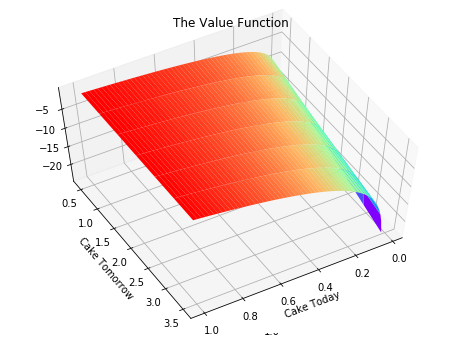

In [366]:
print(V_new1)
x,y = np.meshgrid(W[1:],ep)
plt_3d = plt.figure(figsize=(8,6))
fig = plt_3d.gca(projection='3d')
fig = plt_3d.add_subplot(111,projection='3d')
fig.plot_surface(x.T,y.T,V_new1[1:],cmap=cm.rainbow)
fig.set_xlabel('Cake Today')
fig.set_ylabel('Taste Shock')
fig.set_ylabel('Cake Tomorrow')
fig.set_title('The Value Function')
fig.view_init(elev=60,azim=60)

[[0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 

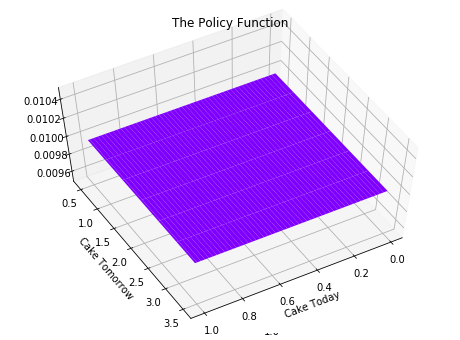

In [367]:
print(W_new1)
x,y = np.meshgrid(W,ep)
plt_3d = plt.figure(figsize=(8,6))
fig = plt_3d.gca(projection='3d')
fig = plt_3d.add_subplot(111,projection='3d')
fig.plot_surface(x.T,y.T,W_new1,cmap=cm.rainbow)
fig.set_xlabel('Cake Today')
fig.set_ylabel('Taste Shock')
fig.set_ylabel('Cake Tomorrow')
fig.set_title('The Policy Function')
fig.view_init(elev=60,azim=60)

In [368]:
d1 = dist(V_new1,V_new)
if d1 > d:
    de = "decreases"
else:
    de = "increases"
    
print("Distance between V_T and V_T+1: ",d)
print("Distance between V_T-1 and V_T: ",d1)
print("The distance",de)

Distance between V_T and V_T+1:  24819.05725970685
Distance between V_T-1 and V_T:  4058.044189762632
The distance increases


### Exercise 20

In [369]:
N = 100
W = np.linspace(1e-2,1,N)

c_mat = np.tile(W.reshape((N,1)),((1,N))) - np.tile(W.reshape((1,N)),((N,1)))
c_pos = c_mat>0
c_mat[~c_pos] = 1e-10
u_mat = u(c_mat)
V_3d = np.array([u_mat*i for i in ep])

V_0 = V_new1
V_prime = V_0 @ gamma.reshape((M,1))
V_prime_mat = np.tile(V_prime.reshape((N,1)),((1,N)))
V_prime_mat[~c_pos] = 1e-10
V_prime_3d = np.array([V_prime_mat for j in range(M)])
V_3d_new2 = V_3d + beta*V_prime_3d

V_new2 = np.zeros((N,M))
W_new2 = np.zeros((N,M))
for i in range(N):
    mat2 = V_3d_new2[:,i,:]
    V_new2[i] = mat2.max(axis=1)
    ind = np.argmax(mat2,axis=1)
    W_new2[i] = W[ind]

[[-1.15129255e+01 -2.30258509e+01 -3.45387764e+01 -4.60517019e+01
  -5.75646273e+01 -6.90775528e+01 -8.05904783e+01]
 [-1.15129255e+01 -2.03548522e+01 -2.26574373e+01 -2.49600224e+01
  -2.72626075e+01 -2.95651926e+01 -3.18677777e+01]
 [-1.15129255e+01 -1.72911417e+01 -1.92471532e+01 -2.12031647e+01
  -2.31591762e+01 -2.51151877e+01 -2.70711992e+01]
 [-1.15129255e+01 -1.54989859e+01 -1.72522649e+01 -1.90055438e+01
  -2.07588228e+01 -2.25121017e+01 -2.42653806e+01]
 [-1.15129255e+01 -1.42274311e+01 -1.58368691e+01 -1.74463070e+01
  -1.90557449e+01 -2.06651828e+01 -2.22746207e+01]
 [-1.15129255e+01 -1.32411366e+01 -1.47390028e+01 -1.62368689e+01
  -1.77347351e+01 -1.92326012e+01 -2.07304673e+01]
 [-1.10285700e+01 -1.24352754e+01 -1.38419807e+01 -1.52486861e+01
  -1.66553914e+01 -1.80620968e+01 -1.94688022e+01]
 [-1.04242993e+01 -1.17539294e+01 -1.30835594e+01 -1.44131894e+01
  -1.57428194e+01 -1.70724494e+01 -1.84020795e+01]
 [-9.90085629e+00 -1.11637206e+01 -1.24265849e+01 -1.36894493e+0

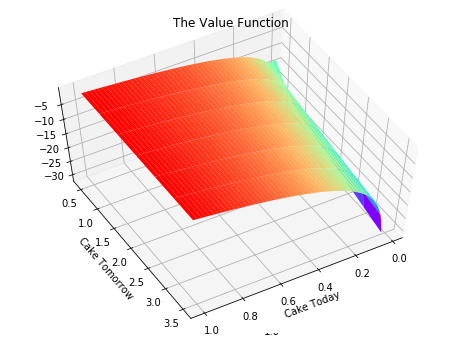

In [370]:
print(V_new2)
x,y = np.meshgrid(W[1:],ep)
plt_3d = plt.figure(figsize=(8,6))
fig = plt_3d.gca(projection='3d')
fig = plt_3d.add_subplot(111,projection='3d')
fig.plot_surface(x.T,y.T,V_new2[1:],cmap=cm.rainbow)
fig.set_xlabel('Cake Today')
fig.set_ylabel('Taste Shock')
fig.set_ylabel('Cake Tomorrow')
fig.set_title('The Value Function')
fig.view_init(elev=60,azim=60)

[[0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.02 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.03 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.04 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.05 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.06 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.01 0.01 

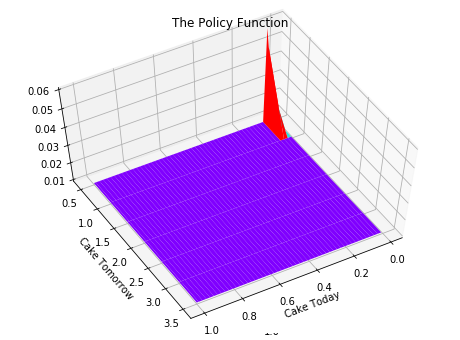

In [371]:
print(W_new2)
x,y = np.meshgrid(W,ep)
plt_3d = plt.figure(figsize=(8,6))
fig = plt_3d.gca(projection='3d')
fig = plt_3d.add_subplot(111,projection='3d')
fig.plot_surface(x.T,y.T,W_new2,cmap=cm.rainbow)
fig.set_xlabel('Cake Today')
fig.set_ylabel('Taste Shock')
fig.set_ylabel('Cake Tomorrow')
fig.set_title('The Policy Function')
fig.view_init(elev=60,azim=60)

### Exercise 21

In [372]:
N = 100
beta =0.9
W = np.linspace(1e-2,1,N)

c_mat = np.tile(W.reshape((N,1)),((1,N))) - np.tile(W.reshape((1,N)),((N,1)))
c_pos = c_mat > 0
c_mat[~c_pos] = 1e-10
u_mat = u(c_mat)
u_3d = np.array([u_mat*j for j in ep])

# Iteration
k = 0
d = 1
V_inp = np.zeros((N,M))
while k <= 1000 and d >= 1e-9:
    
    V_prime = V_inp
    V_prime_ = V_prime.dot(gamma.reshape((M,1)))
    V_prime_mat = np.tile(V_prime_.reshape((1,N)),(N,1))
    V_prime_mat[~c_pos] = 1e-10
    V_prime_3d = np.array([V_prime_mat for j in range(M)])
    V_3d_new = V_3d + beta*V_prime_3d
    V_new = np.zeros((N,M))
    W_new = np.zeros((N,M))
    for i in range(N):
        mat = V_3d_new[:,i,:]
        V_new[i] = mat.max(axis=1)
        ind = np.argmax(mat,axis=1)
        W_new[i] = W[ind]
    d = dist(V_inp, V_new)
    V_inp = V_new
    k += 1
    print("Iteration: ",k, "DIstance",d)

Iteration:  1 DIstance 24819.05725970685
Iteration:  2 DIstance 21712.7825142558
Iteration:  3 DIstance 20208.554235076812
Iteration:  4 DIstance 17202.85688419875
Iteration:  5 DIstance 13931.085733762087
Iteration:  6 DIstance 10841.455566586796
Iteration:  7 DIstance 8071.225641864352
Iteration:  8 DIstance 5476.561514621417
Iteration:  9 DIstance 3286.3008646317303
Iteration:  10 DIstance 1784.595100627884
Iteration:  11 DIstance 824.5621418234854
Iteration:  12 DIstance 222.64986705723146
Iteration:  13 DIstance 7.372535768545394
Iteration:  14 DIstance 3.640873510060881e-07
Iteration:  15 DIstance 0.0


[[-1.15129255e+01 -2.30258509e+01 -3.45387764e+01 -4.60517019e+01
  -5.75646273e+01 -6.90775528e+01 -8.05904783e+01]
 [-1.15129255e+01 -2.03548522e+01 -2.26574373e+01 -2.49600224e+01
  -2.72626075e+01 -2.95651926e+01 -3.18677777e+01]
 [-1.15129255e+01 -1.72911417e+01 -1.92471532e+01 -2.12031647e+01
  -2.31591762e+01 -2.51151877e+01 -2.70711992e+01]
 [-1.15129255e+01 -1.54989859e+01 -1.72522649e+01 -1.90055438e+01
  -2.07588228e+01 -2.25121017e+01 -2.42653806e+01]
 [-1.15129255e+01 -1.42274311e+01 -1.58368691e+01 -1.74463070e+01
  -1.90557449e+01 -2.06651828e+01 -2.22746207e+01]
 [-1.15129255e+01 -1.32411366e+01 -1.47390028e+01 -1.62368689e+01
  -1.77347351e+01 -1.92326012e+01 -2.07304673e+01]
 [-1.10285700e+01 -1.24352754e+01 -1.38419807e+01 -1.52486861e+01
  -1.66553914e+01 -1.80620968e+01 -1.94688022e+01]
 [-1.04242993e+01 -1.17539294e+01 -1.30835594e+01 -1.44131894e+01
  -1.57428194e+01 -1.70724494e+01 -1.84020795e+01]
 [-9.90085629e+00 -1.11637206e+01 -1.24265849e+01 -1.36894493e+0

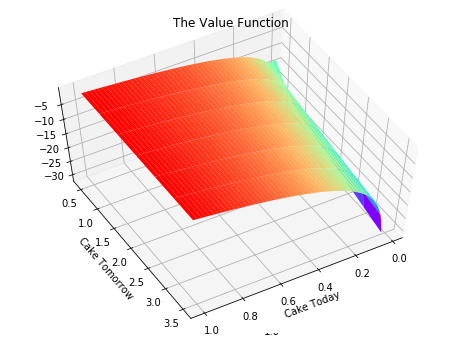

In [373]:
print(V_new2)
x,y = np.meshgrid(W[1:],ep)
plt_3d = plt.figure(figsize=(8,6))
fig = plt_3d.gca(projection='3d')
fig = plt_3d.add_subplot(111,projection='3d')
fig.plot_surface(x.T,y.T,V_new2[1:],cmap=cm.rainbow)
fig.set_xlabel('Cake Today')
fig.set_ylabel('Taste Shock')
fig.set_ylabel('Cake Tomorrow')
fig.set_title('The Value Function')
fig.view_init(elev=60,azim=60)

### Exercise 22

[[0.01 0.01 0.01 0.01 0.01 0.01 0.01]
 [0.02 0.02 0.02 0.02 0.01 0.01 0.01]
 [0.03 0.03 0.03 0.03 0.02 0.01 0.01]
 [0.04 0.04 0.04 0.04 0.02 0.02 0.02]
 [0.05 0.05 0.05 0.05 0.02 0.02 0.02]
 [0.06 0.06 0.06 0.02 0.02 0.02 0.02]
 [0.07 0.07 0.07 0.03 0.02 0.02 0.02]
 [0.08 0.08 0.08 0.04 0.03 0.02 0.02]
 [0.09 0.09 0.09 0.04 0.04 0.03 0.02]
 [0.1  0.1  0.1  0.04 0.04 0.04 0.03]
 [0.11 0.11 0.11 0.04 0.04 0.04 0.04]
 [0.12 0.12 0.12 0.05 0.04 0.04 0.04]
 [0.13 0.13 0.13 0.05 0.05 0.04 0.04]
 [0.14 0.14 0.14 0.08 0.05 0.04 0.04]
 [0.15 0.15 0.15 0.08 0.07 0.05 0.04]
 [0.16 0.16 0.16 0.09 0.08 0.05 0.04]
 [0.17 0.17 0.17 0.09 0.08 0.08 0.05]
 [0.18 0.18 0.18 0.1  0.09 0.08 0.05]
 [0.19 0.19 0.19 0.1  0.09 0.09 0.08]
 [0.2  0.2  0.2  0.11 0.1  0.09 0.08]
 [0.21 0.21 0.21 0.11 0.1  0.09 0.09]
 [0.22 0.22 0.22 0.12 0.11 0.1  0.09]
 [0.23 0.23 0.23 0.12 0.11 0.1  0.09]
 [0.24 0.24 0.24 0.14 0.11 0.1  0.1 ]
 [0.25 0.25 0.25 0.14 0.12 0.11 0.1 ]
 [0.26 0.26 0.26 0.15 0.12 0.11 0.1 ]
 [0.27 0.27 

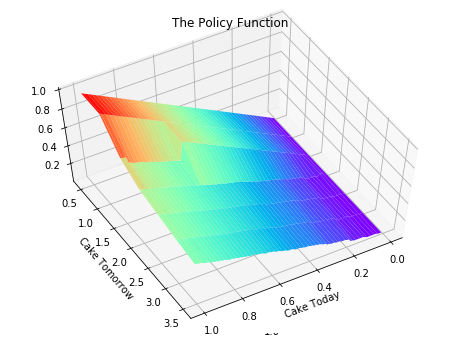

In [374]:
print(W_new)
x,y = np.meshgrid(W,ep)
plt_3d = plt.figure(figsize=(8,6))
fig = plt_3d.gca(projection='3d')
fig = plt_3d.add_subplot(111,projection='3d')
fig.plot_surface(x.T,y.T,W_new,cmap=cm.rainbow)
fig.set_xlabel('Cake Today')
fig.set_ylabel('Taste Shock')
fig.set_ylabel('Cake Tomorrow')
fig.set_title('The Policy Function')
fig.view_init(elev=60,azim=60)